# Demonstration of the BuTools MAM package

Set the precision and import the necessary packages

In [1]:
%precision %g
%run "~/github/butools/Python/BuToolsInit.py"

Butools V2.0
Packages loaded: utils, mc, moments, reptrans, trace, ph, dph, map, dmap, fitting, mam, queues
Global variables: 
butools.verbose = False , butools.checkInput = True , butools.checkPrecision = 1e-12


The MAM (Matrix Analytic Methods) package contains tools for
* solving structured Markov chains
* solving Markov-modulated fluid models

## Solving structured Markov chains

The BuTools MAM package supports the solution of three structured Markov chains.
* QBD (Quasi Birth-Death) processes, which have a block tri-diagonal generator matrix,

    $Q_{QBD}=\begin{bmatrix}L_0 & F \\ B & L & F \\ & B & L & F \\ & & \ddots & \ddots & \ddots\end{bmatrix}$,
* M/G/1 type Markov chains, which have an upper block-Hessenberg generator matrix,
    $Q_{M/G/1}=\begin{bmatrix}B_0 & B_1 & B_2 & B_3 & \cdots \\ A_0 & A_1 & A_2 & A_3 & \cdots \\ & A_0 & A_1 & A_2 & \cdots\\ & & A_0 & A_1 & \cdots \\ & & & \ddots & \cdots\end{bmatrix}$,
* G/M/1 type Markov chains, which have a lower block-Hessenberg generator matrix,
    $Q_{G/M/1}=\begin{bmatrix}B_0 & A_0 \\ B_1 & A_1 & A_0 \\ B_2 & A_2 & A_1 & A_0 & \\ B_3 & A_3 & A_2 & A_1 & A_0 \\ \vdots & \vdots & \vdots & \vdots & \vdots & \ddots\end{bmatrix}$

The MATLAB implementation of the solvers for structured Markov chains call the corresponding functions of the SMC package, thus the SMC packages (both the one for QBD and the one for M/G/1 type systems) must be in the path (use the *addpath* command of MATLAB).

The Mathematica and Python implementations have the solvers built-in, the functions of SMC tools have been ported.

Please cite SMCSolver if you use it in a paper (details are found at http://win.ua.ac.be/~vanhoudt/).

### The solution of QBD processes

Let us define a simple (continuous time) QBD as follows.

In [2]:
B = ml.matrix([[0,0],[3,4]])
L = ml.matrix([[-6,5],[3,-12]])
F = ml.matrix([[1,0],[2,0]])
L0 = ml.matrix([[-6,5],[6,-8]])

There are 3 (fundamental) matrices that play an important role in the analysis of QBDs: matrix $R$, $G$ and $U$. Function **QBDFundamentalMatrices** is able to compute them all.

In [3]:
R, G, U = QBDFundamentalMatrices (B, L, F, matrices="RGU")

Only those matrices are returned that are requested in the *matrices* parameter, and they appear in the same order as requested. Additional parameters like *precision* and *maxNumIt* control the accuracy of the solution.

The *QBDFundamentalMatrices* function also has a *method* parameter that can be used to select the underlying algorithm. The Python and Mathematica implementations support only cyclic reduction currently (which is one of the best), while the Matlab implementation can call every algorithm supported by the SMC package.

Check if the fundamental matrices satisfy the corresponding equations, thus $B+LG+FG^2=0, F+RL+R^2B=0$ and $L+F(-U)^{-1}B=U$:

In [4]:
print(B + L*G + F*G**2)
print(F + R*L + R**2*B)
print(L + F*(-U).I*B - U)

[[  2.77555756e-16   4.44089210e-16]
 [ -3.33066907e-16   0.00000000e+00]]
[[  1.66533454e-16  -2.22044605e-16]
 [  3.33066907e-16  -4.44089210e-16]]
[[  0.00000000e+00   0.00000000e+00]
 [  4.44089210e-16   0.00000000e+00]]


The stationary solution of QBDs is matrix geometric, it is of form $\pi_k=\pi_0 R^k$. The ingredients, i.e. vector $\pi_0$ and matrix $R$ are provided by the **QBDSolve** function.

In [5]:
pi0, R = QBDSolve (B, L, F, L0)
print("pi0= ", pi0)
print("R= ", R)

pi0=  [[ 0.22992392  0.18681319]]
R=  [[ 0.27838828  0.14285714]
 [ 0.55677656  0.28571429]]


For convenience, the **QBDStationaryDistr** function returns the matrix-geometric stationary distribution of the QBD up to level *K*. In the example below, K=10 is set.

In [6]:
QBDStationaryDistr (pi0, R, 10)

matrix([[ 0.22992392,  0.18681319,  0.16802133,  0.08622147,  0.09478126,
          0.04863775,  0.05346635,  0.02743668,  0.03016051,  0.0154771 ,
          0.01701362,  0.00873067,  0.00959743,  0.004925  ,  0.00541393,
          0.0027782 ,  0.00305401,  0.00156719,  0.00172278,  0.00088406,
          0.00097182,  0.0004987 ]])

### The solution of M/G/1-type and G/M/1-type processes

Let us consider a (discrete) G/M/1-type Markov chain defined by matrices below.

In [7]:
A0 = ml.matrix([[0.1, 0.],[0., 0.1]])
A1 = ml.matrix([[0., 0.2],[0., 0.2]])
A2 = ml.matrix([[0., 0.1],[0., 0.]])
A3 = ml.matrix([[0.3, 0.2],[0.3, 0.2]])
A4 = ml.matrix([[0., 0.1],[0.2, 0.]])
B0 = ml.matrix([[0.7, 0.2],[0.3, 0.6]])
B1 = ml.matrix([[0.3, 0.4],[0.5, 0.2]])
B2 = ml.matrix([[0.2, 0.4],[0.1, 0.6]])
B3 = ml.matrix([[0., 0.1],[0.2, 0.]])

The stationary solution of G/M/1 type systems is matrix geometric, $\pi_k=\pi_0 R^k$. Matrix $R$  is obtained by function **GM1FundamentalMatrix**. Since $R$ does not depend on matrices $B_i$, only matrices $A_i$ are passed.

In [8]:
R = GM1FundamentalMatrix([A0, A1, A2, A3, A4])

Let us check if $R$ satisfies the equation $R=A_0+RA_1+R^2A_2+R^3A_3+R^4A_4$:

In [9]:
(A0+R*A1+R**2*A2+R**3*A3+R**4*A4) - R

matrix([[  5.55111512e-17,   3.46944695e-17],
        [ -6.72205347e-18,   0.00000000e+00]])

The stationary distribution itself (up to level *K*) is returned by **GM1StationaryDistr**. The input parameters are the blocks $B_i$ defining the boundary behavior, matrix $R$ obtained above, and the upper limut *K*, which is set to 10 in the example below.

In [10]:
GM1StationaryDistr([B0, B1, B2, B3], R, 10)

matrix([[  5.15197119e-01,   3.57732541e-01,   5.20897881e-02,
           5.88525560e-02,   5.28148194e-03,   8.80139601e-03,
           5.37356718e-04,   1.24861560e-03,   5.49039896e-05,
           1.71422511e-04,   5.63850375e-06,   2.30258612e-05,
           5.82612934e-07,   3.04607308e-06,   6.06369875e-08,
           3.98559887e-07,   6.36438400e-09,   5.17286673e-08,
           6.74483106e-10,   6.67321608e-09,   7.22607614e-11,
           8.56921894e-10]])

Summing the probabilities up to level 100 gives 1 already:

In [11]:
np.sum(GM1StationaryDistr([B0, B1, B2, B3], R, 100))

1

Now define a (discrete time) M/G/1-type Markov chain with the following blocks

In [12]:
A0 = ml.matrix([[0.4, 0.2],[0.3, 0.4]])
A1 = ml.matrix([[0., 0.1],[0., 0.]])
A2 = ml.matrix([[0., 0.2],[0., 0.2]])
A3 = ml.matrix([[0.1, 0.],[0.1, 0.]])
B0 = ml.matrix([[0.1, 0.5],[0.3, 0.4]])
B1 = ml.matrix([[0., 0.1],[0., 0.]])
B2 = ml.matrix([[0.2, 0.],[0., 0.2]])
B3 = ml.matrix([[0., 0.1],[0.1, 0.]])

The stationary solution of M/G/1-type Markov chains is not matrix-geometric, it is something more involved. The matrix $G$, however, plays an important role in the analysis. **MG1FundamentalMatrix** returns the $G$ matrix of an M/G/1-type system.

In [13]:
G = MG1FundamentalMatrix([A0, A1, A2, A3])

It can be checked that $G$ satisfies the necessary matrix equation $G=A_0+A_1 G+A_2 G^2+A_3 G^3$

In [14]:
A0+A1*G+A2*G**2+A3*G**3 - G

matrix([[ 0.,  0.],
        [ 0.,  0.]])

*MG1FundamentalMatrix* uses an advanced, FFT-based cyclic reduction algorithm (of the SMCSolver tool) to obtain this matrix.

Function **MG1StationaryDistr** computes the stationary distribution by the stable Ramaswami formula up to the given level.

In [15]:
MG1StationaryDistr([A0, A1, A2, A3], [B0, B1, B2, B3], G, 10)

matrix([[ 0.10292778,  0.15491506,  0.06018653,  0.07361959,  0.06882166,
          0.10885956,  0.06024491,  0.08046045,  0.03967035,  0.05168217,
          0.02888675,  0.03449178,  0.01926703,  0.02369798,  0.0132404 ,
          0.01611874,  0.00900512,  0.01100167,  0.0061465 ,  0.00750007]])

Summing the probabilities up to level 100 gives 1:

In [16]:
np.sum(MG1StationaryDistr([A0, A1, A2, A3], [B0, B1, B2, B3], G, 100))

1

## The solution of Markov-modulated fluid models

Markov-modulated fluid models are characterized by the generator of continuous time Markov chain  (the background/modulating process) denoted by $Q$ , and a diagonal matrix $R$, which defines the fluid rates at which fluid is accumulated in the fluid storage. Fluid rates can be positive, negative, or zero.

There are two kinds of fluid models supported in BuTools. The simpler one is also called *canonical fluid model* (or canonical fluid flow), where the fluid rates can be either +1 or -1.  In this case, matrix $R$ is not required, just the partitioning of matrix $Q$ according to the associated fluid rate:
    $Q=\begin{bmatrix}Q_{++} & Q_{+-} \\ Q_{-+} & Q_{--}\end{bmatrix}$. The example below defines a canonical fluid model.

In [17]:
Qpp = ml.matrix([[-5., 1.],[2., -3.]])
Qpm = ml.matrix([[2., 1., 1.],[1., 0., 0.]])
Qmm = ml.matrix([[-8., 4., 1.],[2., -12., 3.],[2., 0., -2.]])
Qmp = ml.matrix([[3., 0.],[2., 5.],[0., 0.]])

The stationary fluid level in fluid models has a matrix-exponential distribution. BuTools uses matrix-analytic methods to obtain the parameters of this distribution. Three important parameters are associated with canonical fluid models: matrices $\Psi,K$ and $U$, which are calculated by **FluidFundamentalMatrices**.

In [18]:
Psi, K, U = FluidFundamentalMatrices(Qpp, Qpm, Qmp, Qmm, "PKU")
print("Psi=",Psi)
print("K=",K)
print("U=",U)

Psi= [[ 0.33722394  0.16516588  0.49761017]
 [ 0.33179629  0.12995245  0.53825126]]
K= [[-3.6579964   1.82582941]
 [ 3.25529376 -2.35023773]]
U= [[ -6.98832817   4.49549765   2.49283052]
 [  4.33342932 -11.01990597   6.68647665]
 [  2.           0.          -2.        ]]


Again, the parameter called "matrices" determine which matrices are returned and in which order. The algorithm can be selected from three options: cyclic reduction (CR), SDA and ADDA. (Thanks to Benny Van Houndt for the implementation)

Matrix $\Psi$ is the phase transition probability matrix of returning to level 0 in a given (negative) state if level 0 has been left in a given (positive) state. It is the minimal non-negative solution to a nonsymmetric algebraic riccati equation $0=Q_{+-} + Q_{++}\Psi + \Psi Q_{--} + \Psi Q_{-+}\Psi$. Let us check it in the example:

In [19]:
Qpm + Qpp*Psi + Psi*Qmm + Psi*Qmp*Psi

matrix([[  8.88178420e-16,   1.66533454e-16,   6.66133815e-16],
        [ -2.22044605e-16,   1.11022302e-16,  -1.11022302e-16]])

The stationary solution consists of a probability mass that the fuid level is 0, and a matrix-exponential density $f(x)=\beta e^{K x} B$. All four parameters are returned by **FluidSolve**:

In [20]:
mass0, beta, K, B = FluidSolve(Qpp, Qpm, Qmp, Qmm)
print("mass at 0=", mass0)
print("beta=", beta)
print("K=", K)
print("B=", B)

mass at 0= [[ 0.          0.          0.03751363  0.01530344  0.09792059]]
beta= [[ 0.14314775  0.07651718]]
K= [[-3.6579964   1.82582941]
 [ 3.25529376 -2.35023773]]
B= [[ 1.          0.          0.33722394  0.16516588  0.49761017]
 [ 0.          1.          0.33179629  0.12995245  0.53825126]]


Let us check if the integral is 1:

In [21]:
mass0 + beta*-K.I*B

matrix([[ 0.22065427,  0.20397691,  0.17960231,  0.07825529,  0.31751123]])

In [22]:
np.sum(mass0 + beta*-K.I*B)

1

In fact, the phase-dependent integral (before summing) must equal to the stationary distribution of the background process. Let us check it.

In [23]:
CTMCSolve(np.bmat([[Qpp,Qpm],[Qmp,Qmm]]))

matrix([[ 0.22065427,  0.20397691,  0.17960231,  0.07825529,  0.31751123]])

Besides canonical fluid models, BuTools can solve more general fluid models as well, where the fluid rates can be any positive or negative numbers, or zeros. The corresponding tool is called **GeneralFluidSolve**. Based on the generator of the background process $Q$ and the diagonal matrix of fluid rates $R$ if returns the components of the matrix-exponentially distributed stationary solution and the probability mass at level 0.

In [24]:
Q = ml.matrix([[-6., 1., 3., 2., 0., 0.],[6., -10., 2., 0., 2., 0.],[3., 7., -12., 0., 0., 2.],[5., 0., 0., -9., 1., 3.],[0., 5., 0., 6., -13., 2.],[0., 0., 5., 3., 7., -15.]])
R = ml.matrix([[2., 0., 0., 0., 0., 0.],[0., -4., 0., 0., 0., 0.],[0., 0., -12., 0., 0., 0.],[0., 0., 0., 6., 0., 0.],[0., 0., 0., 0., 0., 0.],[0., 0., 0., 0., 0., -8.]])

In [25]:
mass0, beta, K, B = GeneralFluidSolve(Q, R)
print("mass at 0=", mass0)
print("beta=", beta)
print("K=", K)
print("B=", B)

mass at 0= [[ 0.          0.08224613  0.0694924   0.          0.02381248  0.02072428]]
beta= [[ 0.70195397  0.20504772]]
K= [[-2.46975215  1.1348626 ]
 [ 1.29501774 -1.16863056]]
B= [[ 0.5         0.06108742  0.05457444  0.          0.01617979  0.01259463]
 [ 0.          0.05538938  0.04311605  0.16666667  0.03891262  0.03263124]]


Let us integrate the solution again according to the fluid level:

In [26]:
mass0 + beta*-K.I*B

matrix([[ 0.38327526,  0.18002323,  0.15098722,  0.1533101 ,  0.07200929,
          0.06039489]])

...which should be again equal to the stationary solution of the underlying Markov chain:

In [27]:
CTMCSolve(Q)

matrix([[ 0.38327526,  0.18002323,  0.15098722,  0.1533101 ,  0.07200929,
          0.06039489]])

The convenience function **FluidStationaryDistr** calculates the (cummulative) distribution function at the given points based on the components of the matrix-exponential solution.

In [28]:
x = np.arange(0.0,10.0,0.1)

In [29]:
y = FluidStationaryDistr(mass0, beta, K, B, x)

The returned value, *y*, is a matrix. Every row belongs to an *x* point, and the columns correspond ot the various phases of the background process. The fluid level distribution can be plotted if we dont care about the phases (sum the solution *y* row-wise).

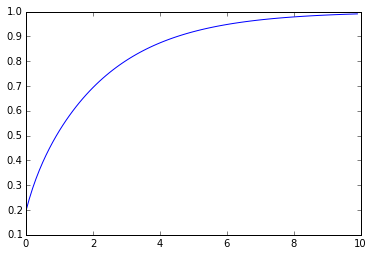

In [30]:
cdf = np.sum(y,1).A.flatten()
plt.plot(x,cdf);